Car Price Prediction

The aim of this project is to predict the price of the car, by analyzing the car features such as brand, year, engine, fuel type, transmission, mileage, drive unit, color, and segment. The project also aims to find out the set  of variables that has most impact on the car price.

The dataset has been taken from kaggle. It has 56244 rows and 12 columns.

In [136]:
import pandas as pd

df=pd.read_csv('cars.csv')
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


In [137]:
df.shape

(56244, 12)

In [138]:
df.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [139]:
df.drop(columns=["model","segment"],inplace=True)

In [140]:
df.nunique()

make                     96
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
dtype: int64

In [141]:
df["make"]

0         mazda
1         mazda
2         mazda
3         mazda
4         mazda
          ...  
56239    lancia
56240    lancia
56241    lancia
56242    lancia
56243    lancia
Name: make, Length: 56244, dtype: object

In [142]:
df["make"].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

In [143]:
# Categorizing the car make
def car_make(make):
    if make in ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']:
        return 'Luxury European'
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche','bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    else:
        return 'Other'
    
df["make_segment"]=df["make"].apply(car_make)
df["make_segment"]

0        Luxury European
1        Luxury European
2        Luxury European
3        Luxury European
4        Luxury European
              ...       
56239              Other
56240              Other
56241              Other
56242              Other
56243              Other
Name: make_segment, Length: 56244, dtype: object

In [144]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Luxury European'),
  Text(1, 0, 'Mainstream European'),
  Text(2, 0, 'Russian/Eastern European'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Specialty'),
  Text(6, 0, 'Asian')])

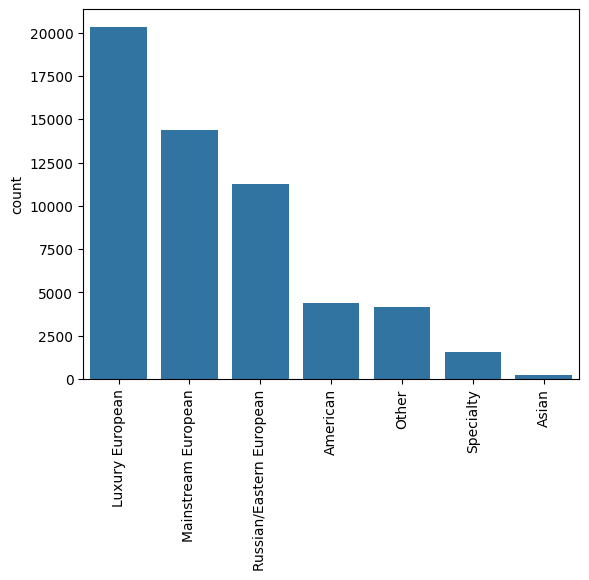

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(x=df['make_segment'].unique(), y=df['make_segment'].value_counts())
plt.xticks(rotation=90)

Categorical Variable Distribution


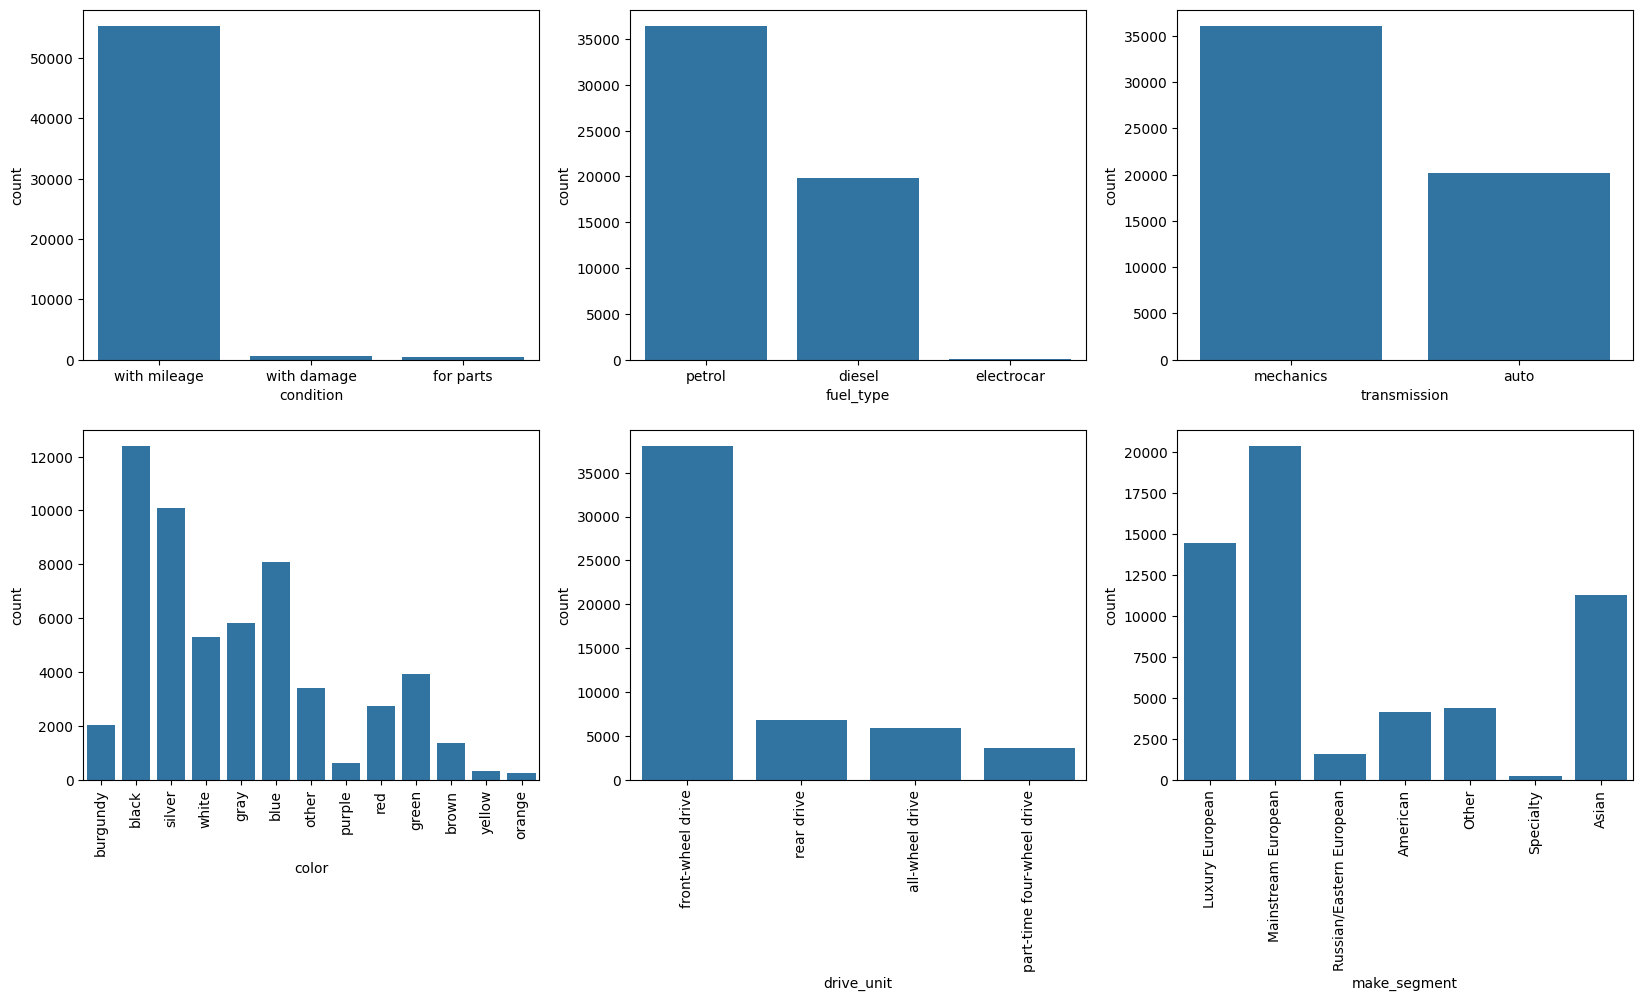

In [146]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='condition', data=df, ax=ax[0,0])
sns.countplot(x='fuel_type', data=df, ax=ax[0,1])
sns.countplot(x='transmission', data=df, ax=ax[0,2])
sns.countplot(x='color', data=df, ax=ax[1,0])
ax[1,0].tick_params(axis='x', rotation=90)
sns.countplot(x='drive_unit', data=df, ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=90)
sns.countplot(x='make_segment', data=df, ax=ax[1,2])
ax[1,2].tick_params(axis='x', rotation=90)

Continuous variable distribution

<Axes: xlabel='volume(cm3)', ylabel='Count'>

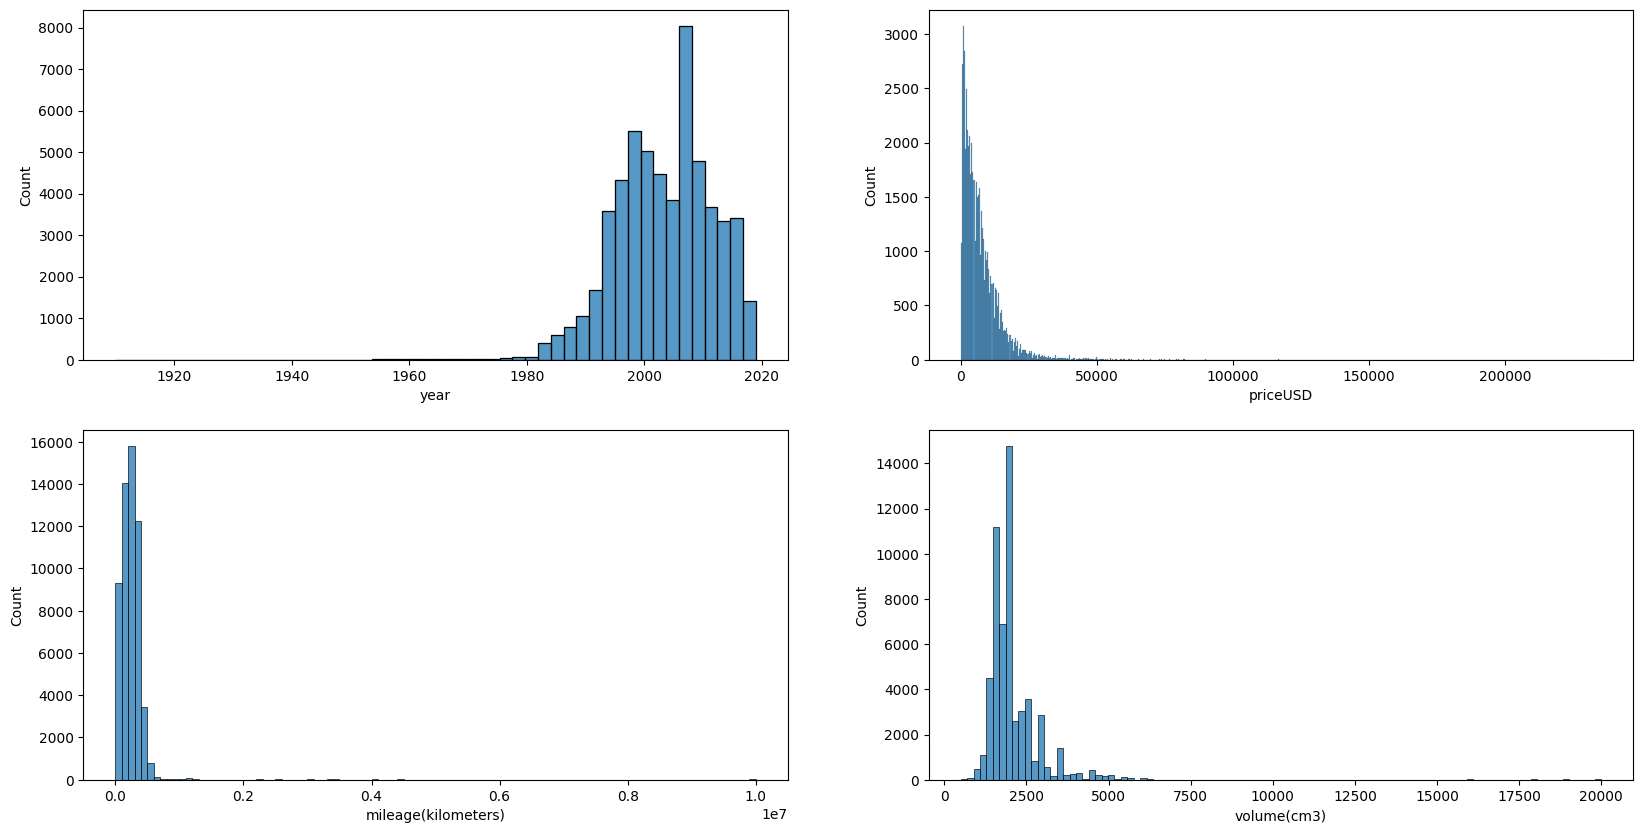

In [147]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot (df['year'], ax=ax[0,0], bins = 50)
sns.histplot(df['priceUSD'], ax=ax[0,1])
sns.histplot(df['mileage(kilometers)'], ax=ax[1,0], bins = 100)
sns.histplot(df['volume(cm3)'], ax=ax[1,1], bins = 100)

Since most of the cars are manufactured after 1980, so I will only consider the cars manufactured after 1980.

In [148]:
df= df[df['year']>1980]
df

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European
...,...,...,...,...,...,...,...,...,...,...,...
56239,lancia,3650,2000,with mileage,290000.0,petrol,2000.0,other,mechanics,front-wheel drive,Other
56240,lancia,4100,1999,with mileage,340000.0,diesel,2100.0,blue,mechanics,front-wheel drive,Other
56241,lancia,3600,1997,with mileage,354000.0,diesel,2100.0,burgundy,mechanics,front-wheel drive,Other
56242,lancia,3000,1997,with mileage,350000.0,petrol,2000.0,blue,mechanics,front-wheel drive,Other


Price and make

In [149]:
demodf = df.groupby('make')
print(demodf["priceUSD"].mean().reset_index())

            make      priceUSD
0          acura  11991.765306
1     alfa-romeo   2691.052863
2            aro   2950.000000
3           asia   7000.000000
4   aston-martin  95000.000000
..           ...           ...
90         volvo   9799.425549
91        vortex   4788.666667
92      wartburg    552.400000
93           zaz   1176.263158
94         zotye   6937.250000

[95 rows x 2 columns]


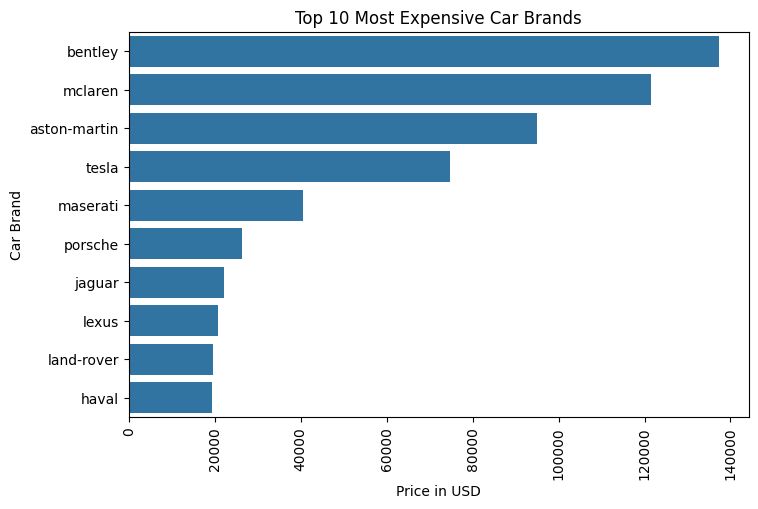

In [150]:
demodf = df.groupby('make')['priceUSD'].mean().reset_index()
demodf = demodf.sort_values(by='priceUSD', ascending=False).head(10)

#b Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(y='make', x='priceUSD', data=demodf)
plt.xticks(rotation=90)
plt.title('Top 10 Most Expensive Car Brands')
plt.ylabel('Car Brand')
plt.xlabel('Price in USD')
plt.show()


Price and Condition

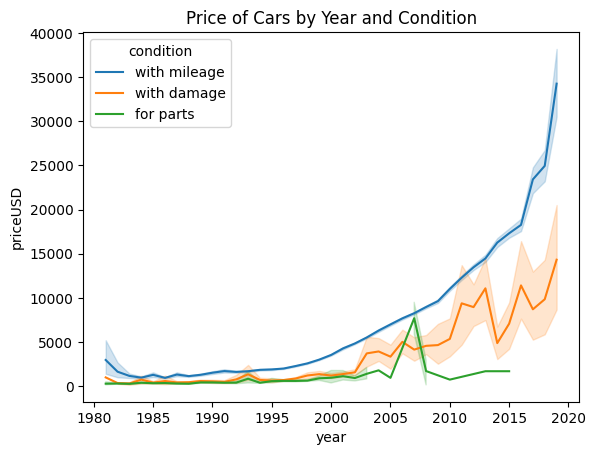

In [151]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

Price and Condition

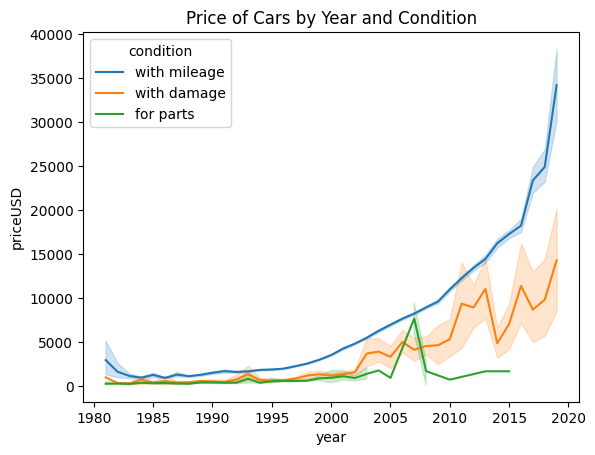

In [152]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

Price and Transmission

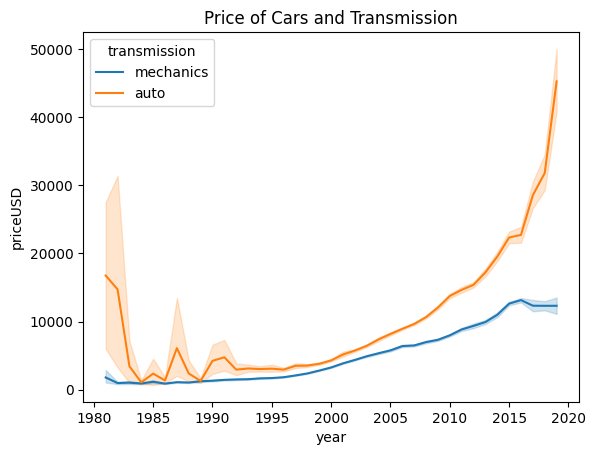

In [153]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'transmission')
plt.title('Price of Cars and Transmission')
plt.show()

Price and Fuel Type

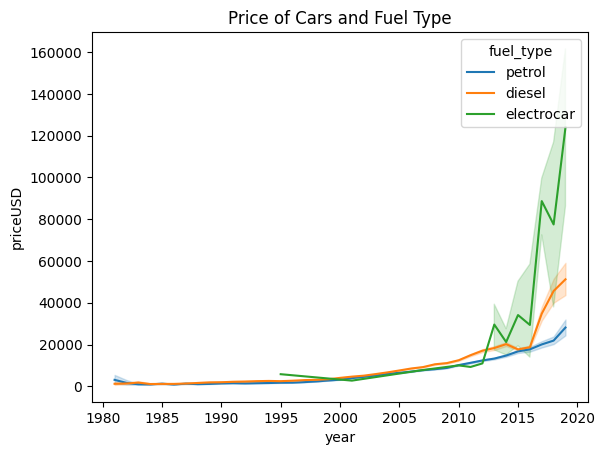

In [154]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'fuel_type')
plt.title('Price of Cars and Fuel Type')
plt.show()

Price and Drive Unit

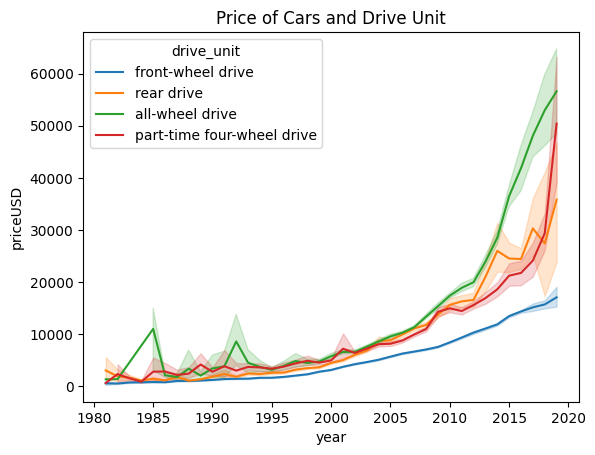

In [155]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'drive_unit')
plt.title('Price of Cars and Drive Unit')
plt.show()

Price and Brand Segment

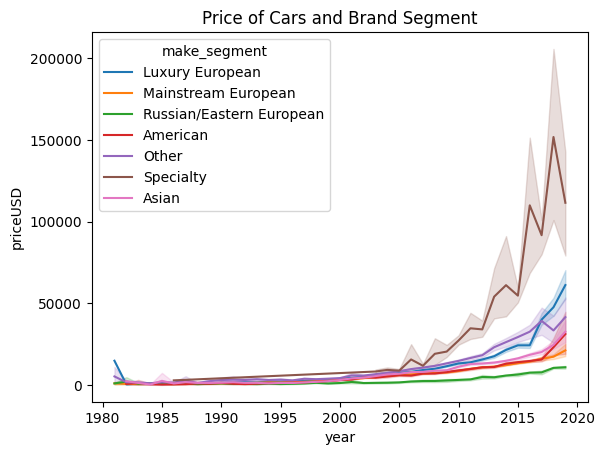

In [156]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'make_segment')
plt.title('Price of Cars and Brand Segment')
plt.show()

Data preprocessing

In [157]:
df.isnull()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
56239,False,False,False,False,False,False,False,False,False,False,False
56240,False,False,False,False,False,False,False,False,False,False,False
56241,False,False,False,False,False,False,False,False,False,False,False
56242,False,False,False,False,False,False,False,False,False,False,False


In [158]:
df.dropna(inplace=True)
df

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European
...,...,...,...,...,...,...,...,...,...,...,...
56239,lancia,3650,2000,with mileage,290000.0,petrol,2000.0,other,mechanics,front-wheel drive,Other
56240,lancia,4100,1999,with mileage,340000.0,diesel,2100.0,blue,mechanics,front-wheel drive,Other
56241,lancia,3600,1997,with mileage,354000.0,diesel,2100.0,burgundy,mechanics,front-wheel drive,Other
56242,lancia,3000,1997,with mileage,350000.0,petrol,2000.0,blue,mechanics,front-wheel drive,Other


In [159]:
df.drop(columns=['make'], inplace=True)

In [160]:
df

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European
...,...,...,...,...,...,...,...,...,...,...
56239,3650,2000,with mileage,290000.0,petrol,2000.0,other,mechanics,front-wheel drive,Other
56240,4100,1999,with mileage,340000.0,diesel,2100.0,blue,mechanics,front-wheel drive,Other
56241,3600,1997,with mileage,354000.0,diesel,2100.0,burgundy,mechanics,front-wheel drive,Other
56242,3000,1997,with mileage,350000.0,petrol,2000.0,blue,mechanics,front-wheel drive,Other


Correlation Matrix Heatmap

In [161]:
from sklearn.preprocessing import LabelEncoder

# columns to encode
cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']

# Label encoding Object 
le = LabelEncoder()

#label encoding for each column
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 3 0 2]
make_segment [2 3 5 0 4 6 1]


In [162]:
df

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,5500,2008,2,162000.0,1,1500.0,3,1,1,2
1,5350,2009,2,120000.0,1,1300.0,0,1,1,2
2,7000,2009,2,61000.0,1,1500.0,10,0,1,2
3,3300,2003,2,265000.0,0,1400.0,11,1,1,2
4,5200,2008,2,97183.0,0,1400.0,4,1,1,2
...,...,...,...,...,...,...,...,...,...,...
56239,3650,2000,2,290000.0,1,2000.0,7,1,1,4
56240,4100,1999,2,340000.0,0,2100.0,1,1,1,4
56241,3600,1997,2,354000.0,0,2100.0,3,1,1,4
56242,3000,1997,2,350000.0,1,2000.0,1,1,1,4


<Axes: >

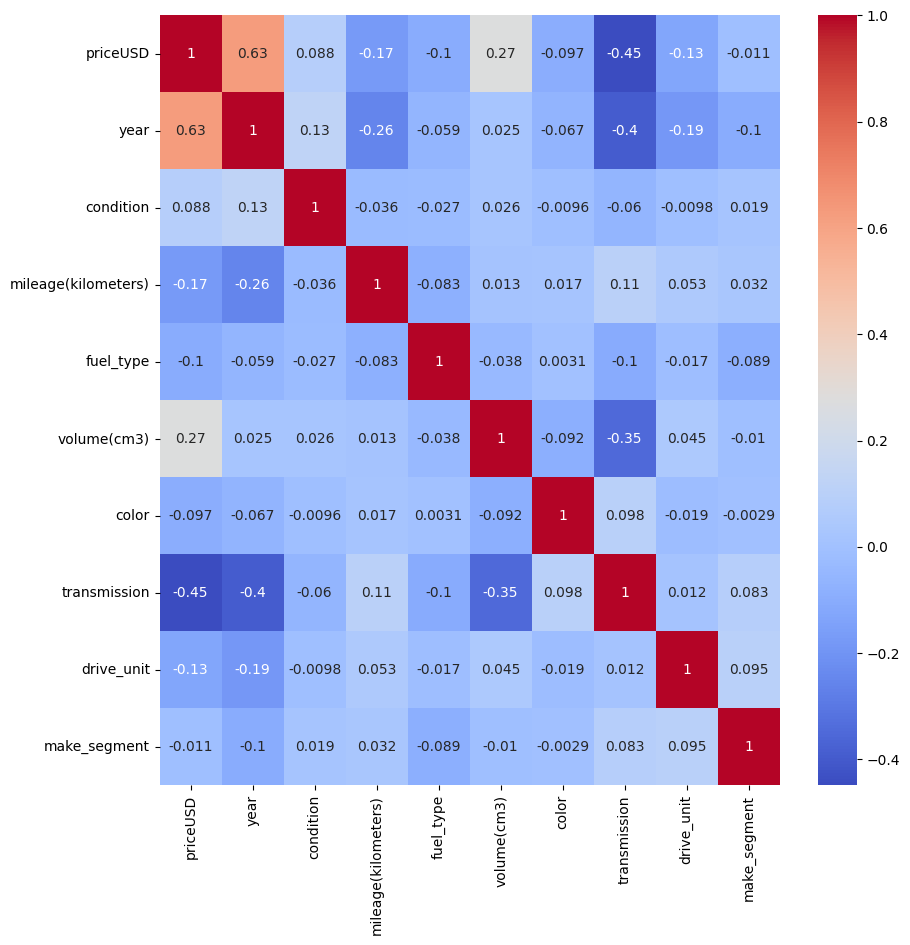

In [163]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Outlier removal


In [164]:
# Using Z-score to remove outliers
from scipy import stats

z = np.abs(stats.zscore(df))

threshold = 3

#columns with outliers
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']

#removing outliers
df = df[(z < 3).all(axis=1)]
df
z

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,0.237296,0.558602,0.120351,0.258465,0.740726,0.642076,0.458914,0.754566,0.25618,0.214869
1,0.255489,0.687761,0.120351,0.388520,0.740726,0.853439,1.174829,0.754566,0.25618,0.214869
2,0.055363,0.687761,0.120351,0.571215,0.740726,0.642076,1.211554,1.325265,0.25618,0.214869
3,0.504132,0.087197,0.120351,0.060477,1.350026,0.747758,1.450192,0.754566,0.25618,0.214869
4,0.273683,0.558602,0.120351,0.459173,1.350026,0.747758,0.220276,0.754566,0.25618,0.214869
...,...,...,...,...,...,...,...,...,...,...
56239,0.461681,0.474676,0.120351,0.137890,0.740726,0.113669,0.495639,0.754566,0.25618,1.494464
56240,0.407101,0.603835,0.120351,0.292717,1.350026,0.007988,0.936191,0.754566,0.25618,1.494464
56241,0.467745,0.862155,0.120351,0.336068,1.350026,0.007988,0.458914,0.754566,0.25618,1.494464
56242,0.540518,0.862155,0.120351,0.323682,0.740726,0.113669,0.936191,0.754566,0.25618,1.494464


In [165]:
z

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,0.237296,0.558602,0.120351,0.258465,0.740726,0.642076,0.458914,0.754566,0.25618,0.214869
1,0.255489,0.687761,0.120351,0.388520,0.740726,0.853439,1.174829,0.754566,0.25618,0.214869
2,0.055363,0.687761,0.120351,0.571215,0.740726,0.642076,1.211554,1.325265,0.25618,0.214869
3,0.504132,0.087197,0.120351,0.060477,1.350026,0.747758,1.450192,0.754566,0.25618,0.214869
4,0.273683,0.558602,0.120351,0.459173,1.350026,0.747758,0.220276,0.754566,0.25618,0.214869
...,...,...,...,...,...,...,...,...,...,...
56239,0.461681,0.474676,0.120351,0.137890,0.740726,0.113669,0.495639,0.754566,0.25618,1.494464
56240,0.407101,0.603835,0.120351,0.292717,1.350026,0.007988,0.936191,0.754566,0.25618,1.494464
56241,0.467745,0.862155,0.120351,0.336068,1.350026,0.007988,0.458914,0.754566,0.25618,1.494464
56242,0.540518,0.862155,0.120351,0.323682,0.740726,0.113669,0.936191,0.754566,0.25618,1.494464


In [169]:
df[z>0]

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,5500,2008,2,162000.0,1,1500.0,3,1,1,2
1,5350,2009,2,120000.0,1,1300.0,0,1,1,2
2,7000,2009,2,61000.0,1,1500.0,10,0,1,2
3,3300,2003,2,265000.0,0,1400.0,11,1,1,2
4,5200,2008,2,97183.0,0,1400.0,4,1,1,2
...,...,...,...,...,...,...,...,...,...,...
56239,3650,2000,2,290000.0,1,2000.0,7,1,1,4
56240,4100,1999,2,340000.0,0,2100.0,1,1,1,4
56241,3600,1997,2,354000.0,0,2100.0,3,1,1,4
56242,3000,1997,2,350000.0,1,2000.0,1,1,1,4


In [170]:
z


,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,0.237296,0.558602,0.120351,0.258465,0.740726,0.642076,0.458914,0.754566,0.25618,0.214869
1,0.255489,0.687761,0.120351,0.388520,0.740726,0.853439,1.174829,0.754566,0.25618,0.214869
2,0.055363,0.687761,0.120351,0.571215,0.740726,0.642076,1.211554,1.325265,0.25618,0.214869
3,0.504132,0.087197,0.120351,0.060477,1.350026,0.747758,1.450192,0.754566,0.25618,0.214869
4,0.273683,0.558602,0.120351,0.459173,1.350026,0.747758,0.220276,0.754566,0.25618,0.214869
...,...,...,...,...,...,...,...,...,...,...
56239,0.461681,0.474676,0.120351,0.137890,0.740726,0.113669,0.495639,0.754566,0.25618,1.494464
56240,0.407101,0.603835,0.120351,0.292717,1.350026,0.007988,0.936191,0.754566,0.25618,1.494464
56241,0.467745,0.862155,0.120351,0.336068,1.350026,0.007988,0.458914,0.754566,0.25618,1.494464
56242,0.540518,0.862155,0.120351,0.323682,0.740726,0.113669,0.936191,0.754566,0.25618,1.494464


Train Test Split

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['priceUSD']), df['priceUSD'], test_size=0.2, random_state=42)

Model Building

Decision Tree Regressor

In [178]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor Object
dtr = DecisionTreeRegressor()

Hypertuning using GridSearchCV

In [181]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
params = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['sqrt', 'log2'],  # Promenjena vrednost 'max_features'
    'random_state': [0,42]
}
# Grid Search Object
grid = GridSearchCV(dtr, param_grid=params, cv=5, verbose=1, n_jobs=-1)

#fitting the grid search
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


In [184]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, random_state=0)

#fitting the model
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=4,
                      random_state=0)

In [187]:
#training score
dtr.score(X_train, y_train)

0.7883902435486847

In [188]:
#predicting the test set
y_pred = dtr.predict(X_test)

In [189]:
y_pred

array([2413.55      , 8083.4020202 , 8889.71892393, ..., 5648.31732243,
       1755.67682727, 1688.25      ])

Model Evaluation

In [190]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.7701494431533182
Mean Squared Error:  7355859.020309841
Mean Absolute Error:  1869.2406549663542
Root Mean Squared Error:  2712.168693188136


Feature Importance

In [191]:
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dtr.feature_importances_})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
feat_df

,Feature,Importance
0,year,0.387447
6,transmission,0.320538
2,mileage(kilometers),0.167548
4,volume(cm3),0.053433
3,fuel_type,0.041817
8,make_segment,0.015295
7,drive_unit,0.008188
5,color,0.005734
1,condition,0.000000


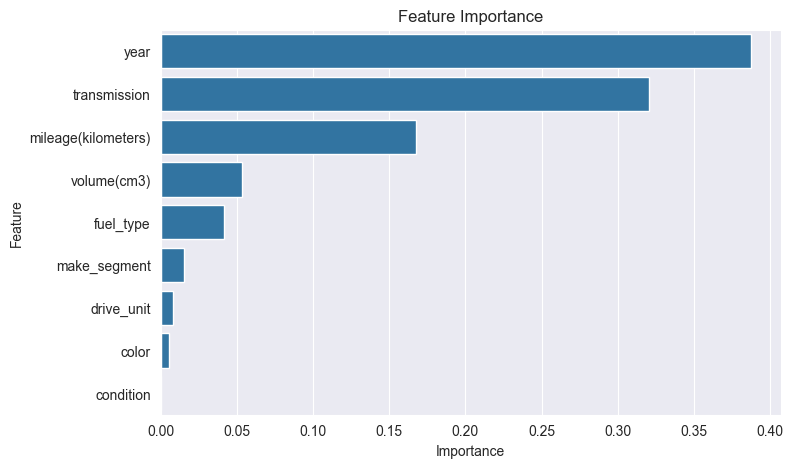

In [192]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.show()